In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression

In [11]:
# Load the dataset
df = pd.read_csv("House_Price.csv")
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [12]:
#

In [13]:
# now we see categorical variables like airport and waterbody 
#using dummy variables for those 
#get_dummies will give true false where astype will give us numeric value
# Fill NaN values with 0 because while converting nam to number 
# discrepancies occurs

# Create dummy variables
df_dummies = pd.get_dummies(df)

# Identify the dummy columns and which is boolean
dummy_columns = df_dummies.select_dtypes(include=['bool']).columns

# Convert only the dummy columns to integers
# if this gets to whole dataset it will round off my float 0.4112 to 0
df_dummies[dummy_columns] = df_dummies[dummy_columns].astype(int)

# Combine with the original DataFrame
df = df_dummies
df.head()



,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,n_hos_beds,n_hot_rooms,rainfall,parks,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,...,5.480,11.1920,23,0.049347,0,1,0,0,1,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,...,7.332,12.1728,42,0.046146,1,0,1,0,0,1
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,...,7.394,101.1200,38,0.045764,1,0,0,0,0,1
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,...,9.268,11.2672,45,0.047151,0,1,1,0,0,1
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,...,8.824,11.2896,55,0.039474,1,0,1,0,0,1


In [14]:
# removing irrelevant columns
del df["airport_NO"]
del df["bus_ter_YES"]
# Define independent and dependent variables
x_multi = df.drop("price", axis=1)
y_multi = df["price"]

In [15]:
# Add a constant to the independent variables
x_multi_constant = sma.add_constant(x_multi)

In [16]:
x_multi_constant.head()

,const,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,1,0,0,1
1,1.0,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,0,1,0,0
2,1.0,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,101.1200,38,0.045764,0,0,0,0
3,1.0,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,1,1,0,0
4,1.0,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,0,1,0,0


In [17]:

# Fit the model
lm_multi = sma.OLS(y_multi, x_multi_constant).fit()

In [18]:
lm_multi.summary()
# rsquared adj is about .7 which is good
# f stat prob is 1.12xe^-122 hence we can say with confidnece that our indedpndant variable has impact on the dependant variable
# the coef represents the coefficient of independant variables as we said beta 1 beta 2 ... beta n
# the lower the p value the more significant the model is in deterimbng y
# the positive sign of coefficient gives positive correlation
# try to look at p value less than 0.05 and take those variable and make the business decision

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     67.51
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          5.82e-123
Time:                        19:22:14   Log-Likelihood:                -1512.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     486   BIC:                             3150.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.1365      5.148     -1.192      0.234     -16.252       3.979
crime_rate                  -0.0749      0.030     -2.500      0.013      -0.134      -0.016
resid_area                  -0.0418      0.057     -0.732      0.465      -0.154       0.070
air_qual                   -19.1830      5.653     -3.393      0.001     -30.290      -8.076
room_num                     4.1303      0.421      9.813      0.000       3.303       4.957
age                         -0.0085      0.014     -0.629      0.530      -0.035       0.018
dist1                       -0.5159      1.848     -0.279      0.780      -4.147       3.116
dist2                        1.2381      1.975      0.627      0.531      -2.643       5.119
dist3                       -1.7921      1.921     -0.933      0.351      -5.567       1.983
dist4                       -0.1719      1.033     -0.166      0.868      -2.202       1.859
teachers                     0.9600      0.119      8.097      0.000       0.727       1.193
poor_prop                   -0.5442      0.052    -10.489      0.000      -0.646      -0.442
n_hos_beds                   0.3644      0.153      2.386      0.017       0.064       0.665
n_hot_rooms                  0.0339      0.042      0.805      0.421      -0.049       0.117
rainfall                     0.0168      0.018      0.941      0.347      -0.018       0.052
parks                       55.1860     51.563      1.070      0.285     -46.128     156.500
airport_YES                  1.0573      0.453      2.335      0.020       0.168       1.947
waterbody_Lake               0.2184      0.641      0.341      0.734      -1.042       1.478
waterbody_Lake and River    -0.7681      0.715     -1.075      0.283      -2.172       0.636
waterbody_River             -0.2728      0.546     -0.500      0.618      -1.346       0.800
==============================================================================
Omnibus:                      198.300   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.606
Skew:                           1.681   Prob(JB):                    6.94e-209
Kurtosis:                       8.845   Cond. No.                     2.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
"""This time we will be using the scikit learn framework to do the same here"""

'This time we will be using the scikit learn framework to do the same here'

In [20]:
lm3 = LinearRegression()

In [21]:
lm3.fit(x_multi, y_multi)

LinearRegression()

In [22]:
print(lm3.intercept_, lm3.coef_)

-6.1365316578285025 [-7.48670960e-02 -4.17653377e-02 -1.91829520e+01  4.13025073e+00
 -8.51839613e-03 -5.15890107e-01  1.23807456e+00 -1.79211084e+00
 -1.71912223e-01  9.59971256e-01 -5.44220366e-01  3.64408115e-01
  3.39398190e-02  1.67781755e-02  5.51859603e+01  1.05725456e+00
  2.18367381e-01 -7.68122757e-01 -2.72767478e-01]


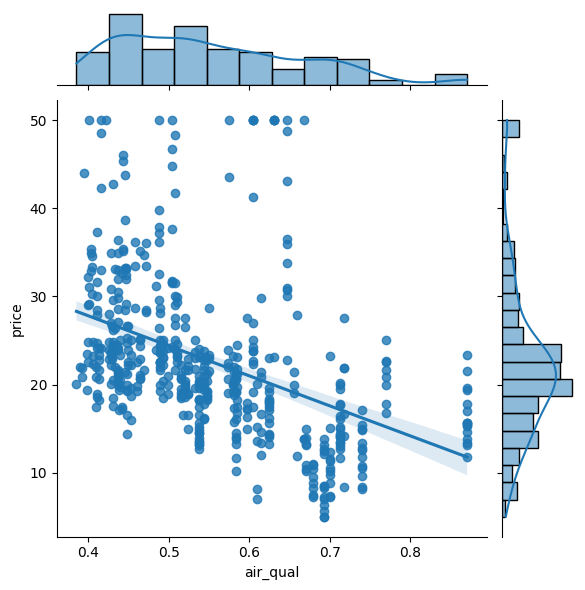

In [23]:
# now we can use any variable from the datart to compare with the dependant variable 
sns.jointplot(x=df["air_qual"],y=df["price"], data=df, kind="reg")

In [24]:
"""Higher the aqu lower the price of ome AQI is supposed to be low as possible to make air quality healthy to live"""

'Higher the aqu lower the price of ome AQI is supposed to be low as possible to make air quality healthy to live'